# Testing re-orientation in shearflow

The result should match Figure 1 in
Huan-Chang Tseng, Rong-Yeu Chang, Chia-Hsiang Hsu: "An objective tensor to predict
anisotropic fiber orientation in concentrated suspensions",
Journal of Rheology 60, 215 (2016):
DOI: 10.1122/1.4939098

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from fiberoripy.orientation import ard_rsc_ode, iardrpr_ode

In [2]:
# geometric factor
xi = 1.0

# time steps
t = np.linspace(0, 2000, 100)

# initial fiber orientation state
A0 = 1.0 / 3.0 * np.eye(3)

In [3]:
# define a function that describes the (time-dependend) velocity gradient
def L(t):
    """Velocity gradient."""
    return np.array([[0.0, 0.0, 1.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]])

In [4]:
# compute solutions by integrating the ODEs
Aref = odeint(ard_rsc_ode, A0.ravel(), t, args=(xi, L, 3.842e-4, 1.0 / 30.0, -1.786e-3, 5.25e-2, 1.168e-5, -5.0e-4),)
A = odeint(iardrpr_ode, A0.ravel(), t, args=(xi, L, 0.025, 1.0, 0.967),)

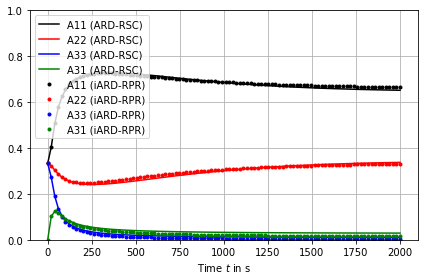

In [5]:
# plot components
plt.plot(t, Aref[:, 0], "k-", label="A11 (ARD-RSC)")
plt.plot(t, Aref[:, 4], "r-", label="A22 (ARD-RSC)")
plt.plot(t, Aref[:, 8], "b-", label="A33 (ARD-RSC)")
plt.plot(t, Aref[:, 2], "g-", label="A31 (ARD-RSC)")
plt.plot(t, A[:, 0], "k.", label="A11 (iARD-RPR)")
plt.plot(t, A[:, 4], "r.", label="A22 (iARD-RPR)")
plt.plot(t, A[:, 8], "b.", label="A33 (iARD-RPR)")
plt.plot(t, A[:, 2], "g.", label="A31 (iARD-RPR)")

# adjust some plot settings.
plt.xlabel("Time $t$ in s")
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()